## Color Identification and distribution using KMeans and OpenCV

####  STEPS FOLLOWED :-
 - Load required libraries and packages <br>
 - Load in the image we will work on <br>
 - Color identification <br>
 - Checking out our creation <br>

#### STEP 1-

In [3]:
#Clustering algorithm to separate out clusters in our case colours
from sklearn.cluster import KMeans 

#plotting graphs and images
import matplotlib.pyplot as plt 


#process images as numpy arrays
import numpy as np 

#image processing library OpenCV
import cv2 

#It is an unordered collection where elements are stored as dictionary keys and 
#their counts are stored as dictionary values.
from collections import Counter 

#Convert image respresentations
from skimage.color import rgb2lab, deltaE_cie76

#loading images
import os

#sets the backend of matplotlib to the 'inline' backend: With this backend, 
#the output of plotting commands is displayed inline within frontends like the Jupyter notebook
%matplotlib inline

#### STEP 2-

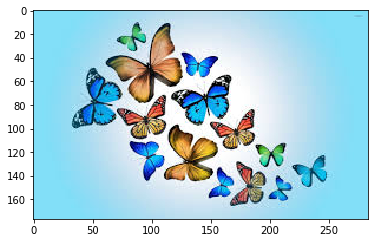

In [4]:
#reading in the image into a numpy array
image = cv2.imread('butterfly.jpeg')

#plot the image
plt.imshow(image)

In [5]:
print("Image is of type {}".format(type(image)))
print("Shape of numpy image array {}".format(image.shape))

Image is of type <class 'numpy.ndarray'>
Shape of numpy image array (177, 284, 3)


In [6]:
# 689, 1067 => pixels in image
# 3 => channels in image

In [7]:
# Since OpenCV by default reads an image as BGR channels instead of RGB the image colors are a bit off. 
# So we will convert the channels to RGB using cv2.cvtColor function

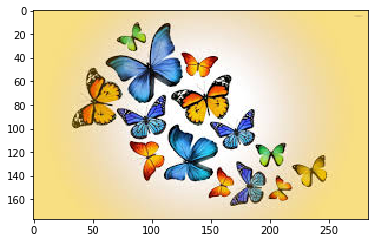

In [8]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

### Superb that's original image

#### STEP 3-

In [9]:
# we will define a function which converts a color (RGB) to its hex code

def colorToHex(color):
    #{:02x} print atleast 2 digits of hex code for a channel
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [10]:
# function to read an image into RGB space

def read_image(image_path):
    #reading in the image into a numpy array
    image = cv2.imread(image_path)
    
    #convert the channels to RGB using cv2.cvtColor function
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [11]:
# fetch colors from image and display as a pie chart distribution
# arguments => image, count of top colors, display_chart

def fetch_colors(image, color_count, display_chart):
    #KMeans expects the input to be of two dimensions, 
    #so we use Numpy’s reshape function to reshape the image data.
    
    modified_image = image.reshape(image.shape[0]*image.shape[1], 3)
    
    #color clusters
    clf = KMeans(n_clusters = color_count)
    
    #fit the model and extract the prediction into the variable predictions
    predictions = clf.fit_predict(modified_image)
    
    #create a collection of count of colors
    counts = Counter(predictions)
    
    center_colors = clf.cluster_centers_
    
    #fetch ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [colorToHex(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]
    
    #if display_chart is true, plot pie chart
    if (display_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return counts, hex_colors,center_colors, predictions

#### STEP 4-

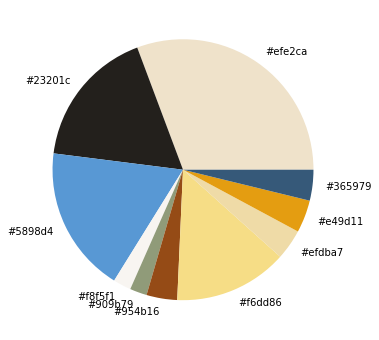

In [12]:
loaded_image = read_image('butterfly.jpeg')
color_count = 10
display_chart  = True

colors_fetched_counts, colors_fetched, center_colors, predictions = fetch_colors(loaded_image, color_count, display_chart)

## SUPERB!!!! Our own color extractor is ready and that too with stats 

In [13]:
#print out fetched colors
colors_fetched

['#efe2ca',
 '#23201c',
 '#5898d4',
 '#f8f5f1',
 '#909b79',
 '#954b16',
 '#f6dd86',
 '#efdba7',
 '#e49d11',
 '#365979']

In [14]:
colors_fetched_counts

Counter({2: 15437,
         5: 8692,
         8: 9125,
         6: 1119,
         3: 1063,
         4: 1910,
         0: 7079,
         1: 1897,
         9: 2029,
         7: 1917})

In [15]:
center_colors

array([[248.92287046, 245.76013561, 241.74035881],
       [ 54.75224038,  89.42540854, 121.30680021],
       [246.44043532, 221.41504178, 134.275183  ],
       [149.48499062,  75.55628518,  22.06097561],
       [ 35.56492147,  32.0895288 ,  28.23141361],
       [239.84803865, 219.0150696 , 167.03991717],
       [144.48928571, 155.50178571, 121.10267857],
       [228.71861925, 157.84832636,  17.40951883],
       [239.71967123, 226.33610959, 202.91484932],
       [ 88.75653031, 152.09906358, 212.81074421]])

In [16]:
predictions

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

<hr>